In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import geopandas
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import networkx as nx

plt.rcParams["figure.figsize"] = (20,15)
plt.rc('font', size=12)

EU28 = [
    'AT', 'BE', 'BG',
    'CZ', 'DE', 'DK',
    'EE', 'GR', 'ES', 
    'FI', 'FR', 'HR', 
    'UK',
    'HU', 'IE', 'IT', 'LT', 'LU', 'LV',
    'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK',
]
OTHER = ['AZ',
         'DZ',
         'TR',
         'RU',
         'LY',
         'CH',
         'NO',
         'RS',
         "UA"
         ]


In [9]:
states =geopandas.read_file(os.path.join("ne_10m_admin_0","ne_10m_admin_0_countries.shp"))
polygon = Polygon([(-15, 28), (50, 28), (50, 70), (-15, 70), (-15, 28)])
states_clip = states.clip(polygon)
states_clip.to_file(os.path.join("eu_base","eu_base.shp"))

c:\Users\czhou\anaconda3\envs\gas\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

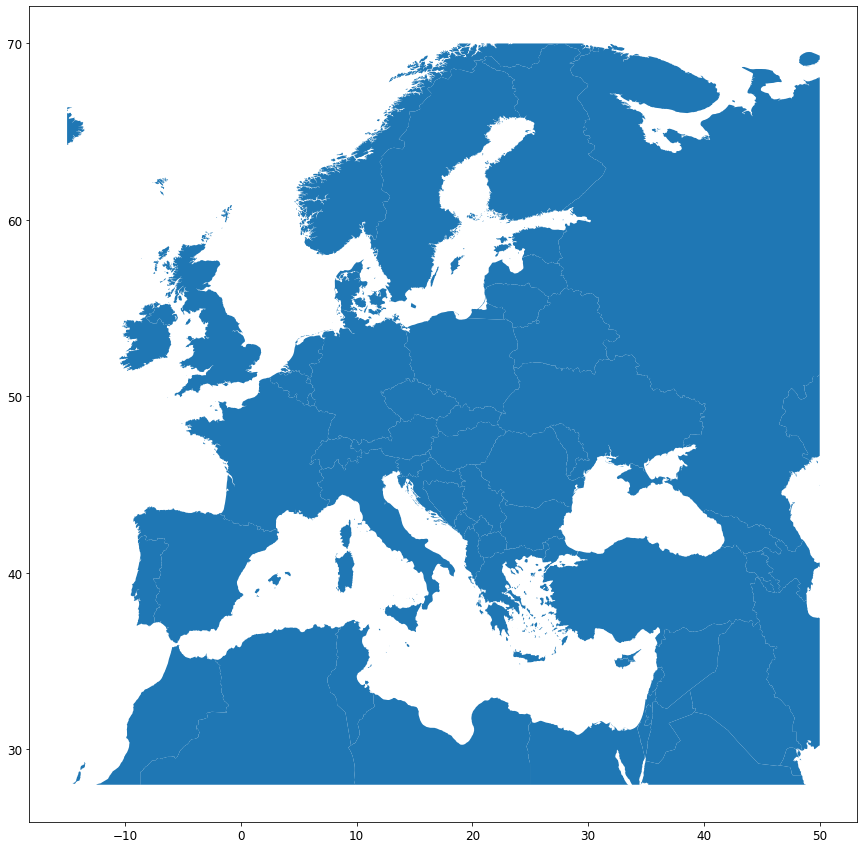

In [4]:
states_clip.plot()

In [2]:
states =geopandas.read_file(os.path.join("ne_10m_admin_0","ne_10m_admin_0_countries.shp"))
polygon = Polygon([(-15, 28), (50, 28), (50, 70), (-15, 70), (-15, 28)])
states_clip = states.clip(polygon)
eu = states_clip[(states_clip["ISO_A2_EH"].isin(EU28+["GB"]+OTHER))] 
eu = eu[["ISO_A2_EH","ADMIN","geometry","NAME"]]
eu_country = eu["ISO_A2_EH"].values

In [3]:
eu['region'] = eu["ISO_A2_EH"]
eu.loc[eu['ISO_A2_EH'].isin(["BE","LU"]), "region"] = "BE-LU"
eu.loc[eu['ISO_A2_EH'].isin(["BE","LU"]), "ISO_A2_EH"] = "BE-LU"
eu.loc[eu['ISO_A2_EH'].isin(["DK","SE"]), "region"] = "DK-SE"
eu.loc[eu['ISO_A2_EH'].isin(["DK","SE"]), "ISO_A2_EH"] = "DK-SE"
eu.loc[eu['ISO_A2_EH'].isin(["EE","LV"]), "region"] = "LV-EE"
eu.loc[eu['ISO_A2_EH'].isin(["EE","LV"]), "ISO_A2_EH"] = "LV-EE"
eu_1 = eu.dissolve(by="region")

In [4]:
eu_1['coords'] = eu_1['geometry'].apply(lambda x: x.representative_point().coords[:])
eu_1['coords'] = [coords[0] for coords in eu_1['coords']]
eu_1=eu_1.reset_index()

In [5]:
eu_1["label_lon"]=eu_1["coords"].apply(lambda x: x[0])
eu_1["label_lat"]=eu_1["coords"].apply(lambda x: x[1])
eu_1 = eu_1.drop(columns=["ISO_A2_EH","coords"])
eu_1

,region,geometry,ADMIN,NAME,label_lon,label_lat
0,AT,"POLYGON ((16.95434 48.55740, 16.94905 48.54484...",Austria,Austria,14.763600,47.694583
1,AZ,"MULTIPOLYGON (((46.00182 38.89747, 45.79109 38...",Azerbaijan,Azerbaijan,47.725755,40.137038
2,BE-LU,"POLYGON ((6.10570 50.09224, 6.09940 50.06413, ...",Luxembourg,Luxembourg,4.971693,50.470021
3,BG,"POLYGON ((26.29491 41.71032, 26.27393 41.71490...",Bulgaria,Bulgaria,25.189683,42.732225
4,CH,"POLYGON ((10.44854 46.83223, 10.44492 46.82324...",Switzerland,Switzerland,8.427001,46.811950
5,CZ,"POLYGON ((14.83168 50.85798, 14.86786 50.86439...",Czechia,Czechia,15.512592,49.800450
6,DE,"MULTIPOLYGON (((6.73357 53.58202, 6.74220 53.5...",Germany,Germany,10.481226,51.085126
7,DK-SE,"MULTIPOLYGON (((11.84262 54.67621, 11.81072 54...",Denmark,Denmark,14.905118,62.194525
8,DZ,"POLYGON ((-8.68239 28.02103, -8.68239 28.08095...",Algeria,Algeria,3.618131,32.544113
9,ES,"MULTIPOLYGON (((-13.82437 28.68179, -13.82116 ...",Spain,Spain,-3.476525,39.899477


In [6]:
eu_1.loc[eu_1["region"]=="GB","region"]="UK"
eu_1.to_file(os.path.join("eu","eu.shp"))

C:\Users\czhou\anaconda3\envs\gas\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


([], [])

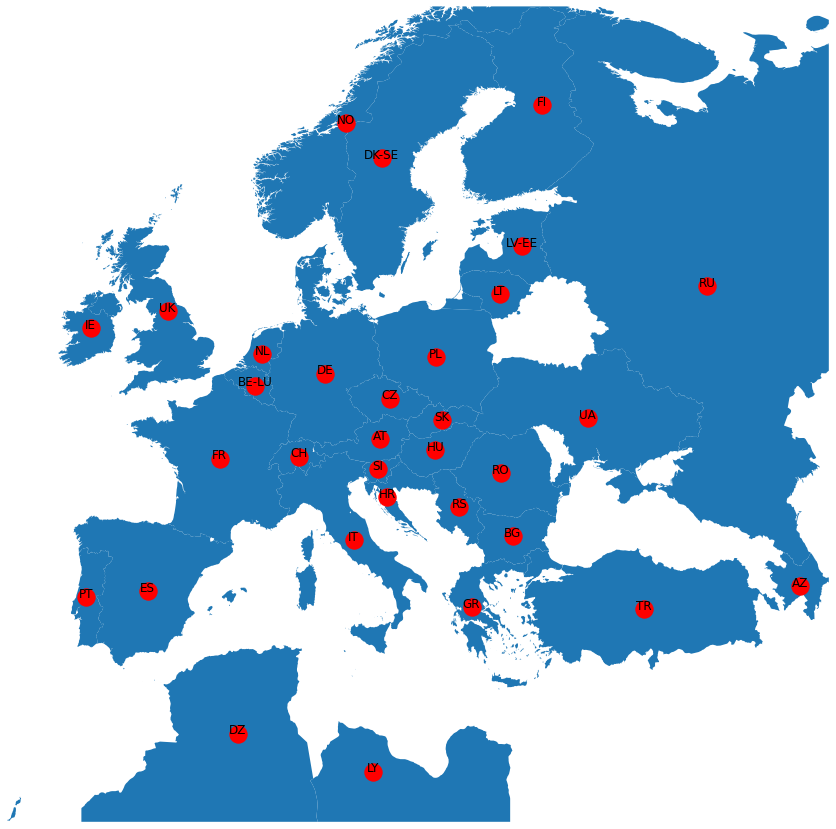

In [7]:
eu =geopandas.read_file(os.path.join("eu","eu.shp"))
eu.loc[eu["region"]=="GB","region"]="UK"

ax = eu.plot(linewidth=0.2)
G = nx.DiGraph()
        
for idx, row in eu.iterrows():
    G.add_node(row['region'], pos=(row['label_lon'], row['label_lat']))
    plt.annotate(text=row['region'], xy=(row['label_lon'], row['label_lat']),
                 horizontalalignment='center')

nx.draw(G, nx.get_node_attributes(G, 'pos'),with_labels=False,ax=ax,node_color="r",)
plt.margins(0,0)
plt.xticks([])
plt.yticks([])